#Bibliotecas Python

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
import re
import gensim
from gensim.test.utils import datapath
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
from google.colab import files
import numpy as np
from time import time
from string import punctuation
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Importação e Tratamento dos Dados

In [ ]:
uploaded = files.upload()

Saving Covid19_tweets.csv to Covid19_tweets.csv


In [ ]:
df = pd.read_csv("Covid19_tweets.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df.shape

(191565, 13)

In [ ]:
df.isnull().sum()

user_name               0
user_location       39354
user_description    11090
user_created            2
user_followers          5
user_friends            5
user_favourites         5
user_verified           5
date                    5
text                    5
hashtags            55407
source                 90
is_retweet              8
dtype: int64

In [ ]:
df = df.dropna(subset=['text'])

In [ ]:
df.shape

(191560, 13)

In [ ]:
df['text'][5]

"#coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want… https://t.co/hXMHooXX2C"

In [ ]:
texto = df['text'].values
texto

array(['If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0',
       "Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu",
       '@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3',
       ...,
       'Naveen_Odisha: Concerned to learn that Union Minister @nitin_gadkari ji is tested positive for #COVID19. Wishing him quick recovery and praying for his good health.',
       '#COVID19  What fresh hell is this?\nhttps://t.co/y583cOgdT0',
       'Director of CDC: face masks may be “more guaranteed to protect me against #COVID19” than a vaccine. Testifying before a Senate subcommittee, Dr Robert Redfield described masks as “the most important, powerful public health tool we have.” #WearAMask https://t.co/h5pasaSdQO'],
      

In [ ]:
def clean_text(text):
    #Texto em letras minúsculas, remoção de links e de pontuações.
    text = text.lower()
    #text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    text = re.sub('\n', '', text)
    #text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
texto_limpo = df['text'].apply(lambda x: clean_text(x))

In [ ]:
texto_limpo[5]

'coronavirus covid19 deaths continue to rise its almost  as bad as it ever was  politicians and businesses want… '

In [ ]:
####################################

#def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#####################################

In [ ]:
#teste2 = teste.apply(lambda x: remove_emoji(x))

In [ ]:
#teste2

#Tokenização

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweetsVec = [nltk.word_tokenize(text) for text in texto_limpo]

In [ ]:
tweetsVec[5]

['coronavirus',
 'covid19',
 'deaths',
 'continue',
 'to',
 'rise',
 'its',
 'almost',
 'as',
 'bad',
 'as',
 'it',
 'ever',
 'was',
 'politicians',
 'and',
 'businesses',
 'want…']

In [ ]:
nltk.download()

In [ ]:
stopword = stopwords.words('english')

In [ ]:
tweetsTokens = []
for i in range(len(tweetsVec)):
    row = []
    for tweet in tweetsVec[i]:
        if tweet not in stopword:
            row.append(tweet)
    tweetsTokens.append(row)

In [ ]:
tweetsTokens[5]

['coronavirus',
 'covid19',
 'deaths',
 'continue',
 'rise',
 'almost',
 'bad',
 'ever',
 'politicians',
 'businesses',
 'want…']

In [ ]:
len(tweetsTokens)

191560

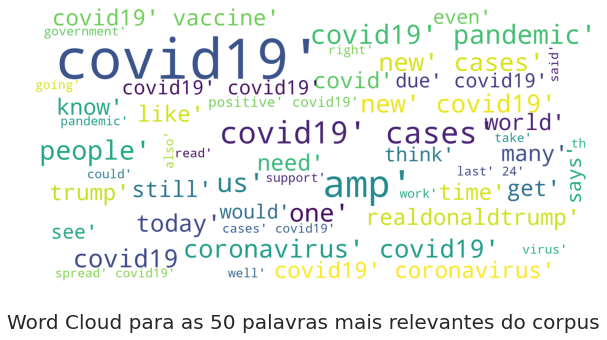

In [ ]:
from wordcloud import WordCloud

word_cloud = WordCloud(
                    background_color='white',
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1, repeat=False).generate(str(tweetsTokens))

fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud para as 50 palavras mais relevantes do corpus', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

#Modelo Word2Vec

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

In [ ]:
model = Word2Vec (min_count = 10, window = 5, size = 300, alpha=0.03, min_alpha=0.0007, sample=6e-5, negative=20, workers=cores-1)

In [ ]:
model.build_vocab(tweetsTokens)

In [ ]:
len(model.wv.vocab)

16873

In [ ]:
model.wv.vocab

In [ ]:
t = time() 

model.train(tweetsTokens, total_examples=model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 3.33 mins


In [ ]:
model['man']

#Visualização

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 15 dimensions with PCA
    reduc = PCA(n_components=15).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


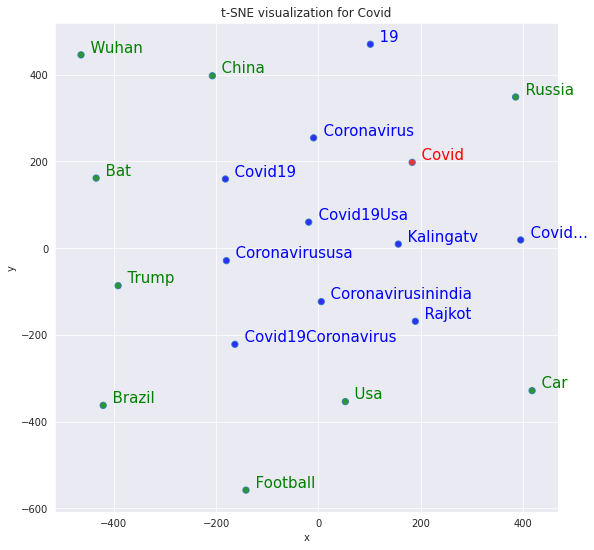

In [ ]:
tsnescatterplot(model, 'covid', ['usa', 'bat', 'brazil', 'football', 'russia', 'china', 'trump', 'wuhan', 'car'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


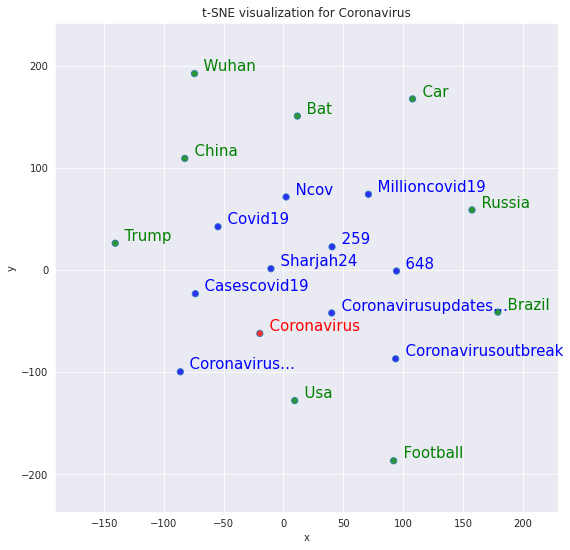

In [ ]:
tsnescatterplot(model, 'coronavirus', ['usa', 'bat', 'brazil', 'football', 'russia', 'china', 'trump', 'wuhan', 'car'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


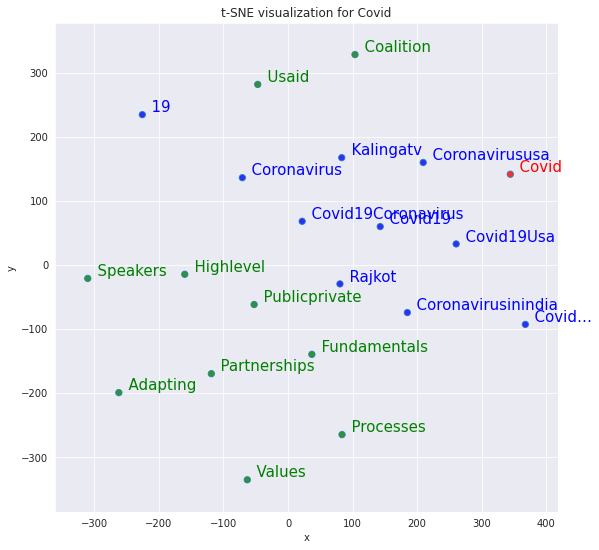

In [ ]:
tsnescatterplot(model, 'covid', [i[0] for i in model.wv.most_similar(negative=['covid'])])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


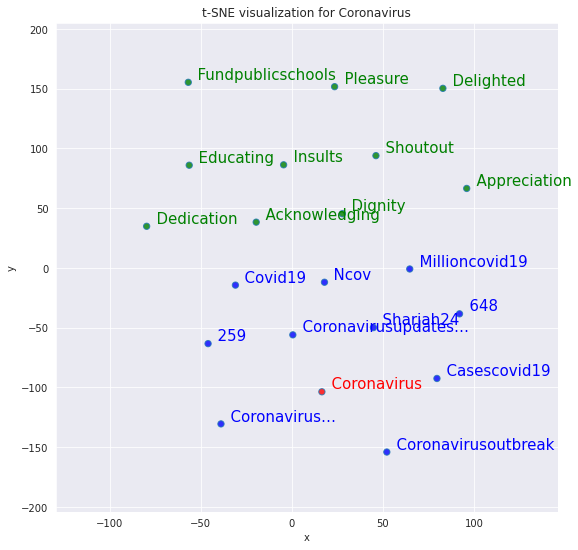

In [ ]:
tsnescatterplot(model, 'coronavirus', [i[0] for i in model.wv.most_similar(negative=['coronavirus'])])

#Accuracy

The accuracy() method of a gensim word-vectors model (now disfavored in comparison to evaluate_word_analogies()) doesn't take your texts as input - it requires a specifically-formatted file of word-analogy challenges. This file is often named questions-words.txt.

This is a popular way to test general-purpose word-vectors, going back to the original Word2Vec paper and code-release from Google.

However, this evaluation doesn't necessarily indicate which word-vectors will be best for your needs. (For example, it's possible for a set of word-vectors to score better on these kinds of analogies, but be worse for a specific classification or info-retrieval goal.)

For good vectors for your own purposes, you should devise some task-specific evaluation, that gives a score correlated with the success on your final goal.

Also, note that as an unsupervised algorithm, word-vectors don't necessarily need a held-out test set to be evaluated. You generally want to use as much data as possible to train the word-vectors – ensuring maximal vocabulary coverage, with the most examples per word. Then you might test the word-vectors to some external standard – like the analogy questions, that weren't part of the training set at all.

Or, you'd just use the word-vectors as an additional input to some downstream task you're testing, and on that downstream task you'd withhold a test set from what's used to train some supervised algorithm. That ensures your supervised method isn't just memorizing/overfitting the labeled inputs, and gives you an indirect quality signal about whether that word-vector set helped the downstream task, or not. (And, that word-vector set could be compared against others based on how well they help that other supervised task – not against their own same unsupervised train-up step.)

In [ ]:
uploaded2 = files.upload()

Saving questions-words.txt to questions-words.txt


In [ ]:
questions = 'questions-words.txt'

def w2v_model_accuracy(modelo):
    accuracy = modelo.accuracy(questions)
    sum_corr = len(accuracy[-1]['correct'])
    sum_incorr = len(accuracy[-1]['incorrect'])
    total = sum_corr + sum_incorr
    percent = lambda a: a / total * 100
    
    print('Total sentences: {}, Correct: {:.2f}%, Incorrect: {:.2f}%'.format(total, percent(sum_corr), percent(sum_incorr)))


In [ ]:
w2v_model_accuracy(model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Total sentences: 6392, Correct: 8.35%, Incorrect: 91.65%


In [ ]:
model.wv.accuracy(questions)

In [ ]:
uploaded3 = files.upload()

Saving wordsim_similarity_goldstandard.txt to wordsim_similarity_goldstandard.txt


In [ ]:
model.wv.evaluate_word_pairs('wordsim_similarity_goldstandard.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


((0.5451534338901375, 5.671708405202372e-12),
 SpearmanrResult(correlation=0.5001219374320018, pvalue=4.894649523618552e-10),
 32.51231527093596)

In [ ]:
model.predict_output_word(['russia', 'covid', 'trump', 'vaccine'], topn=5)

[('putin', 0.015952386),
 ('russianvaccine', 0.013079321),
 ('approved', 0.010978387),
 ('claims', 0.008389392),
 ('vaccinecovid19', 0.007430495)]

In [ ]:
model.wv.doesnt_match(['covid', 'corona', 'trump', 'dog', 'russia'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'dog'

In [ ]:
model.wv.doesnt_match(['coronavirus', 'corona', 'trump', 'dog', 'russia'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'dog'

In [ ]:
#pd.DataFrame(data=np.dot(model.wv.syn0norm, model.wv.syn0norm.T), index=model.wv.vocab, columns=model.wv.vocab)

In [ ]:
model.wv.most_similar('man')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('woman', 0.5321769714355469),
 ('boy', 0.4168213903903961),
 ('grandmother', 0.408908486366272),
 ('knife', 0.39897578954696655),
 ('2a', 0.393054336309433),
 ('cop', 0.38866767287254333),
 ('girl', 0.38529646396636963),
 ('guy', 0.38297224044799805),
 ('hermancain', 0.3807571232318878),
 ('lady', 0.37786972522735596)]

In [ ]:
model.wv.similarity('hand','sanitizer')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.64874035

In [ ]:
model.wv.distances('covid',['corona','trump', 'car', 'dog','yankees'])

array([0.7304628 , 0.9182653 , 0.9575422 , 0.94720536, 0.9019604 ],
      dtype=float32)

In [ ]:
model.wv.similarity('coronavirus','covid19')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.60583735

In [ ]:
model.wv.similarity('coronavirus','corona')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.2681969

In [ ]:
model.similarity('china','coronavirus')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.1746854

In [ ]:
model.wv.most_similar(positive=["covid"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('covid19', 0.43312540650367737),
 ('coronavirus', 0.38540130853652954),
 ('19', 0.34018829464912415),
 ('covid19coronavirus', 0.3142298460006714),
 ('coronavirusinindia', 0.2875782251358032),
 ('rajkot', 0.28485146164894104),
 ('kalingatv', 0.27895283699035645),
 ('coronavirususa', 0.2737879753112793),
 ('covid19usa', 0.27103427052497864),
 ('covid…', 0.27032095193862915)]

In [ ]:
model.wv.most_similar(positive=["corona"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('coronavirusapp', 0.5475970506668091),
 ('healthandmedical', 0.540333092212677),
 ('worldnews', 0.5227607488632202),
 ('coronarvirues', 0.4632510542869568),
 ('utcconfirmed', 0.45566487312316895),
 ('coronainfoch', 0.44998899102211),
 ('korona', 0.4402688443660736),
 ('repor…', 0.43677911162376404),
 ('coronavirusupdates…', 0.4007622301578522),
 ('coronaoutbreak', 0.3986811637878418)]

In [ ]:
model.wv.most_similar(positive=["coronavirus"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('covid19', 0.605837345123291),
 ('ncov', 0.5530866384506226),
 ('coronavirusoutbreak', 0.5411646962165833),
 ('coronavirus…', 0.5328003168106079),
 ('casescovid19', 0.4980965852737427),
 ('sharjah24', 0.4905471205711365),
 ('259', 0.4689311385154724),
 ('coronavirusupdates…', 0.46217378973960876),
 ('648', 0.4583767354488373),
 ('millioncovid19', 0.45334112644195557)]

In [ ]:
model.wv.most_similar(positive=["symptoms"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('symptoms…', 0.6054184436798096),
 ('mild', 0.5137252807617188),
 ('breathlessness', 0.4925871789455414),
 ('flulike', 0.48345550894737244),
 ('selfisolate', 0.4792368710041046),
 ('symptom', 0.4702759385108948),
 ('sy…', 0.4612232446670532),
 ('allergies', 0.4603668451309204),
 ('fever', 0.4571998119354248),
 ('symptomatic', 0.4550493061542511)]

In [ ]:
model.predict_output_word(['covid', 'vaccine'])

[('19', 0.082416594),
 ('race', 0.015292119),
 ('russianvaccine', 0.010854223),
 ('covidvaccine', 0.008273198),
 ('russian', 0.006431021),
 ('covidvaccinerace', 0.005195074),
 ('rushed', 0.0047095297),
 ('vaccinecovid19', 0.004029067),
 ('distribution', 0.0038091624),
 ('guaranteed', 0.0033819703)]

In [ ]:
model.wv.most_similar(positive=['usa', 'putin'], negative=['trump'], topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('🇷🇺', 0.43279579281806946),
 ('russia', 0.42340362071990967),
 ('vladimir', 0.3991331160068512),
 ('vladimirputin', 0.3807653784751892),
 ('mexico…', 0.37783968448638916)]

In [ ]:
vec1 = model['symptom'] - model['vaccine'] + model['flu']
model.most_similar([vec1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('flu', 0.7235898971557617),
 ('seasonal', 0.6076458096504211),
 ('symptom', 0.5940319299697876),
 ('flu…', 0.5169699192047119),
 ('colds', 0.5090028047561646),
 ('allergies', 0.5054475665092468),
 ('pneumonia', 0.46132105588912964),
 ('deadlier', 0.43187519907951355),
 ('1918', 0.4277469515800476),
 ('influenza', 0.42304134368896484)]

In [ ]:
vec0 = model['germany'] - model['berlin'] + model['paris']
model.most_similar([vec0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('germany', 0.5813759565353394),
 ('paris', 0.44734668731689453),
 ('france', 0.35642319917678833),
 ('portugal', 0.3488478660583496),
 ('greece', 0.3178122043609619),
 ('norway', 0.3134100139141083),
 ('japan…', 0.3076392412185669),
 ('sharjah24', 0.3058493435382843),
 ('insi…', 0.3053658902645111),
 ('australia', 0.2942212224006653)]

In [ ]:
# 100 trees are being used in this example
annoy_index = AnnoyIndexer(model, 100)
# Derive the vector for the word "science" in our model
vector = model.wv["covid"]
# The instance of AnnoyIndexer we just created is passed
approximate_neighbors = model.wv.most_similar([vector], topn=11, indexer=annoy_index)
# Neatly print the approximate_neighbors and their corresponding cosine similarity values
print("Approximate Neighbors")
for neighbor in approximate_neighbors:
    print(neighbor)

normal_neighbors = model.wv.most_similar([vector], topn=11)
print("\nNormal (not Annoy-indexed) Neighbors")
for neighbor in normal_neighbors:
    print(neighbor)

/usr/local/lib/python3.6/dist-packages/gensim/similarities/index.py:180: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  index = AnnoyIndex(num_features)


Approximate Neighbors
('covid', 1.0)
('covid…', 0.3959805369377136)
('covidー19…', 0.395916223526001)
('corona', 0.3956562280654907)
('coron…', 0.39516353607177734)
('positive…', 0.3912593722343445)
('lasted', 0.3907635807991028)
('hospitalized', 0.3891695737838745)
('fifty', 0.38761264085769653)
('virus', 0.3853296637535095)
('actress', 0.3853034973144531)

Normal (not Annoy-indexed) Neighbors
('covid', 1.0)
('covid19', 0.433125376701355)
('coronavirus', 0.38540133833885193)
('19', 0.34018829464912415)
('covid19coronavirus', 0.3142298460006714)
('coronavirusinindia', 0.2875782251358032)
('rajkot', 0.28485143184661865)
('kalingatv', 0.27895283699035645)
('coronavirususa', 0.2737879753112793)
('covid19usa', 0.27103424072265625)
('covid…', 0.27032095193862915)


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# Usando o modelo Word2Vec treinado pelo Google

In [ ]:
import gensim.downloader as api
google_w2v = api.load('word2vec-google-news-300')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
google_w2v['man']

In [ ]:
google_w2v.most_similar('man')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('woman', 0.7664012908935547),
 ('boy', 0.6824870109558105),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903800010681),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.5716364979743958),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409236907959),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [ ]:
google_w2v.wv.most_similar(positive=['usa', 'putin'], negative=['trump'], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kosovo', 0.5792039036750793),
 ('uk', 0.5628201961517334),
 ('ukraine', 0.5411897897720337),
 ('russia', 0.5357376933097839),
 ('ethiopia', 0.5326341390609741)]

In [ ]:
google_w2v.wv.doesnt_match(['coronavirus', 'corona', 'trump', 'dog', 'russia'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'trump'

In [ ]:
vec2 = google_w2v['symptom'] - google_w2v['vaccine'] + google_w2v['flu']
google_w2v.most_similar([vec2])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('symptom', 0.6844702959060669),
 ('symptoms', 0.5177110433578491),
 ('symptons', 0.49582451581954956),
 ('sinus_infection', 0.48785677552223206),
 ('flulike_symptoms', 0.4592069089412689),
 ('strep_throat', 0.45609599351882935),
 ('flu', 0.44971007108688354),
 ('scratchy_throat', 0.4496777653694153),
 ('sore_throat', 0.44604992866516113),
 ('Drew_Gooden_plantar_fasciitis', 0.4426387846469879)]

In [ ]:
vec3 = google_w2v['Germany'] - google_w2v['Berlin'] + google_w2v['Paris']
google_w2v.most_similar([vec3])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('France', 0.7724405527114868),
 ('Paris', 0.6798242926597595),
 ('Belgium', 0.598486065864563),
 ('Germany', 0.5652832984924316),
 ('extradites_Noriega', 0.5623601078987122),
 ('Villebon_Sur_Yvette', 0.5570638179779053),
 ('Spain', 0.550815761089325),
 ('Italy', 0.5462925434112549),
 ('Marseille', 0.5372347831726074),
 ('Switzerland', 0.5364958047866821)]

In [ ]:
google_w2v.wv.similarity('hand','sanitizer')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.16875228

In [ ]:
google_w2v.wv.similarity('china','coronavirus')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.08068481

In [ ]:
google_w2v.wv.similarity('corona','coronavirus')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.29671735

In [ ]:
w2v_model_accuracy(google_w2v)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Total sentences: 13190, Correct: 77.08%, Incorrect: 22.92%


In [ ]:
google_w2v.wv.evaluate_word_pairs('wordsim_similarity_goldstandard.txt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


((0.7274073802463878, 1.0315287261963853e-34),
 SpearmanrResult(correlation=0.7407997973424757, pvalue=1.393053399834267e-36),
 0.0)

In [ ]:
google_w2v.wv.most_similar('coronavirus')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('corona_virus', 0.7276226282119751),
 ('coronaviruses', 0.7216538190841675),
 ('paramyxovirus', 0.7113003730773926),
 ('SARS_coronavirus', 0.6601907014846802),
 ('arenavirus', 0.6494410037994385),
 ('influenza_virus', 0.6449826955795288),
 ('H#N#_subtype', 0.6360139846801758),
 ('H#N#_strain', 0.6324741840362549),
 ('H7_virus', 0.6261191964149475),
 ('flu_virus', 0.6249204874038696)]

In [ ]:
google_w2v.wv.most_similar('corona')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('photosphere', 0.6423506140708923),
 ('solar_corona', 0.6241670846939087),
 ('spicules', 0.6198908090591431),
 ('X_ray_emission', 0.6174540519714355),
 ('sun_corona', 0.6173224449157715),
 ('ionized_gas', 0.601172685623169),
 ('magnetosphere', 0.5965927839279175),
 ('protoplanetary_disk', 0.5947983264923096),
 ('quasar', 0.5930385589599609),
 ('nebula', 0.5912905335426331)]

In [ ]:
google_w2v.wv.most_similar('symptoms')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('symptons', 0.7250155210494995),
 ('neurological_symptoms', 0.7048485279083252),
 ('gastrointestinal_symptoms', 0.6799999475479126),
 ('neurologic_symptoms', 0.6670845150947571),
 ('Symptoms', 0.6643037796020508),
 ('respiratory_symptoms', 0.6632425785064697),
 ('hay_fever_symptoms', 0.6294068098068237),
 ('symtoms', 0.6252099275588989),
 ('prodrome', 0.6180528402328491),
 ('nonspecific_symptoms', 0.6128507256507874)]

In [ ]:
google_w2v.wv.most_similar('covid')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use sel

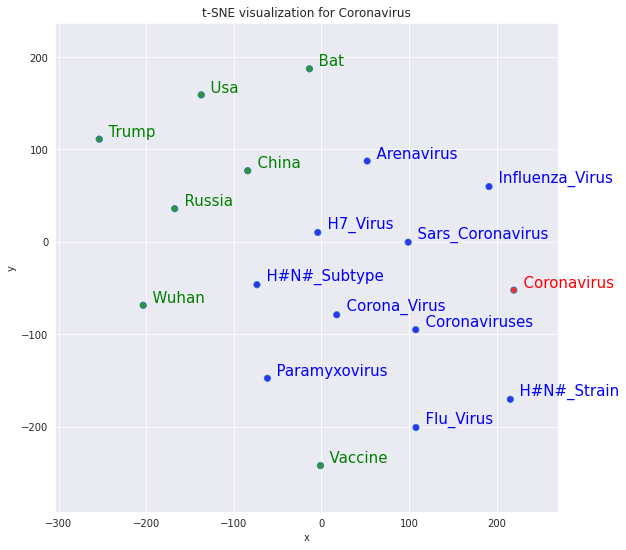

In [ ]:
tsnescatterplot(wv, 'coronavirus', ['USA', 'bat', 'vaccine', 'Russia', 'China', 'Trump', 'Wuhan'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated 

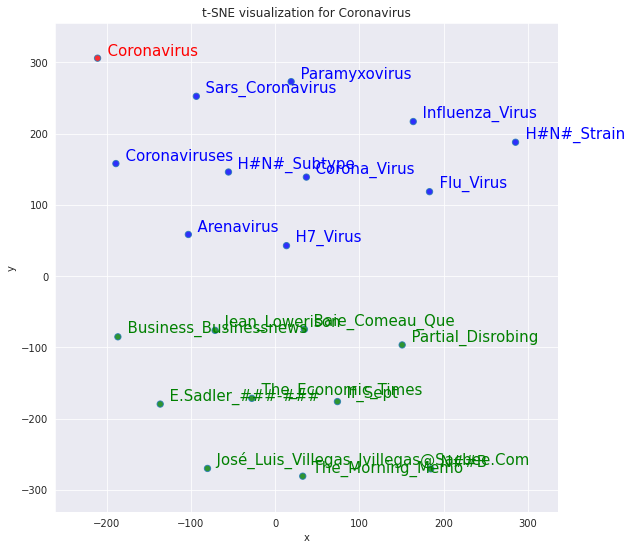

In [ ]:
tsnescatterplot(wv, 'coronavirus', [i[0] for i in wv.wv.most_similar(negative=['coronavirus'])])